## Loading the dataset

In [1]:
import pandas as pd
import numpy as np

tata_power = pd.read_csv("/Users/sparshpatel/Documents/Codes/codes/pythonml/stock analysis/TTPW Historical Data.csv")  
power_grid = pd.read_csv("/Users/sparshpatel/Documents/Codes/codes/pythonml/stock analysis/PGRD Historical Data.csv")  


print(tata_power.head())
print(power_grid.head())


         Date   Price    Open    High     Low    Vol. Change %
0  20-02-2025  357.95  348.00  361.00  344.55  10.10M    2.96%
1  19-02-2025  347.65  337.00  350.00  334.70   6.08M    2.37%
2  18-02-2025  339.60  337.20  340.80  329.65   6.54M    0.71%
3  17-02-2025  337.20  337.10  338.50  326.35   7.22M    0.01%
4  14-02-2025  337.15  349.05  351.15  332.00   8.58M   -3.08%
         Date   Price    Open    High     Low    Vol. Change %
0  20-02-2025  265.75  262.75  266.45  261.30  15.31M    1.03%
1  19-02-2025  263.05  262.50  268.50  262.30  14.60M   -1.46%
2  18-02-2025  266.95  263.85  267.90  260.20  10.48M    1.42%
3  17-02-2025  263.20  256.90  264.00  252.20   8.33M    2.27%
4  14-02-2025  257.35  260.40  261.50  254.75  11.34M   -0.69%


## Cleaning the dataset

In [2]:

tata_power["Date"] = pd.to_datetime(tata_power["Date"], format="%d-%m-%Y")
power_grid["Date"] = pd.to_datetime(power_grid["Date"], format="%d-%m-%Y")


def clean_numeric_column(df, col):
    df[col] = df[col].astype(str).str.replace(",", "").str.replace("%", "").astype(float)


columns_to_convert = ["Price", "Open", "High", "Low", "Change %"]
for col in columns_to_convert:
    if tata_power[col].dtype != "float64" and tata_power[col].dtype != "int64":
        clean_numeric_column(tata_power, col)
    if power_grid[col].dtype != "float64" and power_grid[col].dtype != "int64":
        clean_numeric_column(power_grid, col)


tata_power.rename(columns={"Price": "Close"}, inplace=True)
power_grid.rename(columns={"Price": "Close"}, inplace=True)

tata_power = tata_power.sort_values(by="Date").reset_index(drop=True)
power_grid = power_grid.sort_values(by="Date").reset_index(drop=True)


if "Vol." in tata_power.columns:
    tata_power.drop(columns=["Vol."], inplace=True)
if "Vol." in power_grid.columns:
    power_grid.drop(columns=["Vol."], inplace=True)


print(tata_power.head())
print(power_grid.head())
print(tata_power.info())
print(power_grid.info())


        Date   Close    Open    High     Low  Change %
0 2023-02-01  205.85  214.90  215.40  196.65     -3.31
1 2023-02-02  206.30  204.95  208.80  204.00      0.22
2 2023-02-03  205.30  207.50  208.20  202.00     -0.48
3 2023-02-06  208.55  209.00  212.85  206.75      1.58
4 2023-02-07  206.30  209.50  210.00  205.00     -1.08
        Date   Close    Open    High     Low  Change %
0 2023-02-01  162.41  168.75  168.75  160.20     -0.05
1 2023-02-02  159.52  162.00  162.82  158.51     -1.78
2 2023-02-03  161.14  159.90  161.36  157.80      1.01
3 2023-02-06  162.79  160.09  163.01  159.79      1.02
4 2023-02-07  162.64  163.50  163.65  161.32     -0.09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      512 non-null    datetime64[ns]
 1   Close     512 non-null    float64       
 2   Open      512 non-null    float64       
 3   H

## Adding Signals

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert Date to datetime format
tata_power['Date'] = pd.to_datetime(tata_power['Date'])
power_grid['Date'] = pd.to_datetime(power_grid['Date'])

# Merge on Date
pair_data = pd.merge(tata_power[['Date', 'Close']], power_grid[['Date', 'Close']], on='Date', suffixes=('_Tata', '_PowerGrid'))

# Calculate the price ratio
pair_data['Ratio'] = pair_data['Close_Tata'] / pair_data['Close_PowerGrid']

# Compute 20 and 50 EMA on the ratio
pair_data['EMA_20'] = pair_data['Ratio'].ewm(span=20, adjust=False).mean()
pair_data['EMA_50'] = pair_data['Ratio'].ewm(span=50, adjust=False).mean()

# Identify crossover signals
pair_data['Signal'] = np.where(pair_data['EMA_20'] > pair_data['EMA_50'], 1, -1)
pair_data['Position'] = pair_data['Signal'].diff()

# Identify trades
entries = pair_data[pair_data['Position'] == 1]
exits = pair_data[pair_data['Position'] == -1]




In [71]:
pair_data.head(20)

,Date,Close_Tata,Close_PowerGrid,Ratio,EMA_20,EMA_50,Signal,Position
0,2023-02-01,205.85,162.41,1.267471,1.267471,1.267471,-1,NaN
1,2023-02-02,206.30,159.52,1.293255,1.269927,1.268482,1,2.0
2,2023-02-03,205.30,161.14,1.274047,1.270319,1.268701,1,0.0
3,2023-02-06,208.55,162.79,1.281098,1.271346,1.269187,1,0.0
4,2023-02-07,206.30,162.64,1.268446,1.271070,1.269158,1,0.0
5,2023-02-08,207.15,159.00,1.302830,1.274094,1.270478,1,0.0
6,2023-02-09,205.50,159.64,1.287271,1.275349,1.271137,1,0.0
7,2023-02-10,204.80,160.57,1.275456,1.275360,1.271306,1,0.0
8,2023-02-13,203.60,162.00,1.256790,1.273591,1.270737,1,0.0
9,2023-02-14,203.10,161.25,1.259535,1.272252,1.270298,1,0.0


## Applying the pair trade logic
We long tata and short powergrid when ema 20 rises above ema 50, and vice versa when ema 20 falls below ema 50

In [ ]:

trades = []
position = None  

for i in range(len(pair_data) - 1):
    date = pair_data.iloc[i]['Date']
    tata_price = pair_data.iloc[i]['Close_Tata']
    powergrid_price = pair_data.iloc[i]['Close_PowerGrid']
    signal = pair_data.iloc[i]['Position']

    if signal == 2:  
        if position is None:  
            trades.append({
                'Date': date,
                'Action': 'Buy Tata Power',
                'Tata Power Price': tata_price,
                'Power Grid Price': None
            })
            position = 'Tata Long'
        else:  
            trades.append({
                'Date': date,
                'Action': 'Exit PowerGrid, Buy Tata Power',
                'Tata Power Price': tata_price,
                'Power Grid Price': powergrid_price
            })
            position = 'Tata Long'

    elif signal == -2:  
        if position is None:  
            trades.append({
                'Date': date,
                'Action': 'Buy PowerGrid',
                'Tata Power Price': None,
                'Power Grid Price': powergrid_price
            })
            position = 'PowerGrid Long'
        else:  
            trades.append({
                'Date': date,
                'Action': 'Exit Tata Power, Buy PowerGrid',
                'Tata Power Price': tata_price,
                'Power Grid Price': powergrid_price
            })
            position = 'PowerGrid Long'


trades_df = pd.DataFrame(trades)

pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.max_colwidth', None) 
print(trades_df)




         Date                          Action  Tata Power Price  Power Grid Price
0  2023-02-02                  Buy Tata Power            206.30               NaN
1  2023-02-23  Exit Tata Power, Buy PowerGrid            201.30            159.94
2  2023-05-30  Exit PowerGrid, Buy Tata Power            216.90            176.32
3  2023-07-05  Exit Tata Power, Buy PowerGrid            221.70            189.94
4  2023-07-10  Exit PowerGrid, Buy Tata Power            225.00            187.50
5  2023-10-17  Exit Tata Power, Buy PowerGrid            256.90            207.15
6  2023-12-01  Exit PowerGrid, Buy Tata Power            276.00            210.20
7  2024-02-21  Exit Tata Power, Buy PowerGrid            375.45            280.10
8  2024-03-15  Exit PowerGrid, Buy Tata Power            380.75            265.95
9  2024-05-14  Exit Tata Power, Buy PowerGrid            430.35            309.25
10 2024-09-18  Exit PowerGrid, Buy Tata Power            440.60            334.30
11 2024-11-18  E

In [ ]:
# Re-import necessary libraries after execution state reset
import pandas as pd

# Sample trade data (already extracted from previous step)
trade_data = [
    ["2023-02-02", "Buy Tata Power", 206.30, None],
    ["2023-02-23", "Exit Tata Power, Buy PowerGrid", 201.30, 159.94],
    ["2023-05-30", "Exit PowerGrid, Buy Tata Power", 216.90, 176.32],
    ["2023-07-05", "Exit Tata Power, Buy PowerGrid", 221.70, 189.94],
    ["2023-07-10", "Exit PowerGrid, Buy Tata Power", 225.00, 187.50],
    ["2023-10-17", "Exit Tata Power, Buy PowerGrid", 256.90, 207.15],
    ["2023-12-01", "Exit PowerGrid, Buy Tata Power", 276.00, 210.20],
    ["2024-02-21", "Exit Tata Power, Buy PowerGrid", 375.45, 280.10],
    ["2024-03-15", "Exit PowerGrid, Buy Tata Power", 380.75, 265.95],
    ["2024-05-14", "Exit Tata Power, Buy PowerGrid", 430.35, 309.25],
    ["2024-09-18", "Exit PowerGrid, Buy Tata Power", 440.60, 334.30],
    ["2024-11-18", "Exit Tata Power, Buy PowerGrid", 404.70, 312.05],
    ["2025-02-11", "Exit PowerGrid, Buy Tata Power", 349.10, 261.45],
]

# Convert to DataFrame
df_trades = pd.DataFrame(trade_data, columns=["Date", "Action", "Tata Power Price", "Power Grid Price"])
df_trades["Date"] = pd.to_datetime(df_trades["Date"])

# Display first few rows

df_trades


,Date,Action,Tata Power Price,Power Grid Price
0,2023-02-02,Buy Tata Power,206.30,NaN
1,2023-02-23,"Exit Tata Power, Buy PowerGrid",201.30,159.94
2,2023-05-30,"Exit PowerGrid, Buy Tata Power",216.90,176.32
3,2023-07-05,"Exit Tata Power, Buy PowerGrid",221.70,189.94
4,2023-07-10,"Exit PowerGrid, Buy Tata Power",225.00,187.50
5,2023-10-17,"Exit Tata Power, Buy PowerGrid",256.90,207.15
6,2023-12-01,"Exit PowerGrid, Buy Tata Power",276.00,210.20
7,2024-02-21,"Exit Tata Power, Buy PowerGrid",375.45,280.10
8,2024-03-15,"Exit PowerGrid, Buy Tata Power",380.75,265.95
9,2024-05-14,"Exit Tata Power, Buy PowerGrid",430.35,309.25


In [83]:
# Extract entry and exit points
entry_points = pair_data[pair_data["Position"] == 2].copy()
exit_points = pair_data[pair_data["Position"] == -2].copy()

# Ensure we have equal number of entries and exits (trades)
num_trades = min(len(entry_points), len(exit_points))
entry_points = entry_points.iloc[:num_trades].reset_index(drop=True)
exit_points = exit_points.iloc[:num_trades].reset_index(drop=True)

# Create a DataFrame to store trade details
trade_summary = pd.DataFrame({
    "Entry Date": entry_points["Date"],
    "Exit Date": exit_points["Date"],
    "Tata Power Entry Price": entry_points["Close_Tata"],
    "Tata Power Exit Price": exit_points["Close_Tata"],
    "Power Grid Entry Price": entry_points["Close_PowerGrid"],
    "Power Grid Exit Price": exit_points["Close_PowerGrid"],
    "Ratio Entry": entry_points["Ratio"],
    "Ratio Exit": exit_points["Ratio"]
})

# Display the DataFrame
print(trade_summary)


  Entry Date  Exit Date  Tata Power Entry Price  Tata Power Exit Price  Power Grid Entry Price  Power Grid Exit Price  Ratio Entry  Ratio Exit
0 2023-02-02 2023-02-23                  206.30                 201.30                  159.52                 159.94     1.293255    1.258597
1 2023-05-30 2023-07-05                  216.90                 221.70                  176.32                 189.94     1.230150    1.167211
2 2023-07-10 2023-10-17                  225.00                 256.90                  187.50                 207.15     1.200000    1.240164
3 2023-12-01 2024-02-21                  276.00                 375.45                  210.20                 280.10     1.313035    1.340414
4 2024-03-15 2024-05-14                  380.75                 430.35                  265.95                 309.25     1.431660    1.391593
5 2024-09-18 2024-11-18                  440.60                 404.70                  334.30                 312.05     1.317978    1.296908

---
## Backtesting

In [42]:

# Initialize variables for backtesting
capital = 100000  # Starting capital (assumed)
allocation = capital / 2  # Split equally between Tata Power & Power Grid
positions = {"Tata Power": None, "Power Grid": None}
pnl = []

# Loop through the trade data to calculate P&L
for i in range(len(df_trades) - 1):
    entry = df_trades.iloc[i]
    exit_trade = df_trades.iloc[i + 1]

    # Identify buy and sell actions
    if "Buy Tata Power" in entry["Action"]:
        buy_price = entry["Tata Power Price"]
        shares_tata = allocation / buy_price
        positions["Tata Power"] = shares_tata

    if "Buy PowerGrid" in entry["Action"]:
        buy_price = entry["Power Grid Price"]
        shares_pg = allocation / buy_price
        positions["Power Grid"] = shares_pg

    if "Exit Tata Power" in exit_trade["Action"]:
        sell_price = exit_trade["Tata Power Price"]
        pnl_tata = positions["Tata Power"] * sell_price - allocation
        positions["Tata Power"] = None  # Reset position
    else:
        pnl_tata = 0  # No Tata Power trade

    if "Exit PowerGrid" in exit_trade["Action"]:
        sell_price = exit_trade["Power Grid Price"]
        pnl_pg = positions["Power Grid"] * sell_price - allocation
        positions["Power Grid"] = None  # Reset position
    else:
        pnl_pg = 0  # No Power Grid trade

    total_pnl = pnl_tata + pnl_pg
    pnl.append(total_pnl)

# Convert P&L to DataFrame
df_pnl = pd.DataFrame({"Date": df_trades["Date"][1:], "P&L": pnl})
df_pnl["Cumulative P&L"] = df_pnl["P&L"].cumsum()

# Show the first few results
df_pnl


,Date,P&L,Cumulative P&L
1,2023-02-23,-1211.827436,-1211.827436
2,2023-05-30,5120.670251,3908.842816
3,2023-07-05,1106.500692,5015.343507
4,2023-07-10,-642.308097,4373.035410
5,2023-10-17,7088.888889,11461.924299
6,2023-12-01,736.181511,12198.105810
7,2024-02-21,18016.304348,30214.410158
8,2024-03-15,-2525.883613,27688.526545
9,2024-05-14,6513.460276,34201.986820
10,2024-09-18,4050.121261,38252.108081


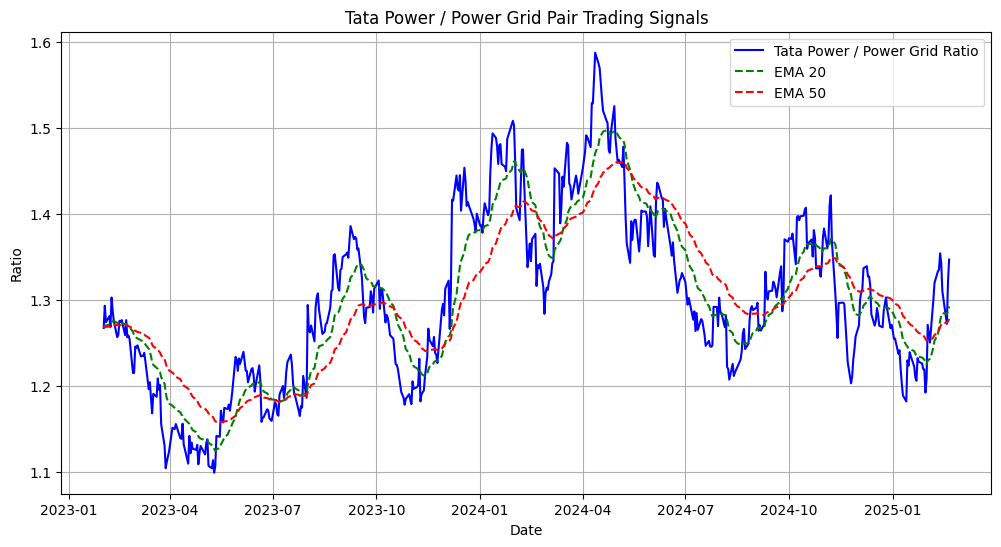

In [77]:
# Plot the ratio with EMA and trade signals
plt.figure(figsize=(12,6))
plt.plot(pair_data['Date'], pair_data['Ratio'], label='Tata Power / Power Grid Ratio', color='blue')
plt.plot(pair_data['Date'], pair_data['EMA_20'], label='EMA 20', linestyle='dashed', color='green')
plt.plot(pair_data['Date'], pair_data['EMA_50'], label='EMA 50', linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.title("Tata Power / Power Grid Pair Trading Signals")
plt.legend()
plt.grid()
plt.show()

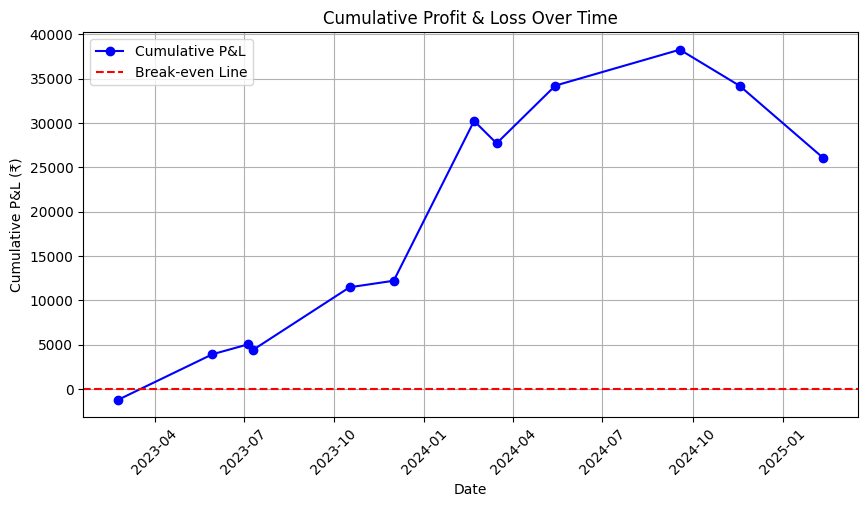

In [43]:
import matplotlib.pyplot as plt

# Plot cumulative P&L
plt.figure(figsize=(10, 5))
plt.plot(df_pnl["Date"], df_pnl["Cumulative P&L"], marker="o", linestyle="-", color="b", label="Cumulative P&L")
plt.axhline(y=0, color="r", linestyle="--", label="Break-even Line")
plt.xlabel("Date")
plt.ylabel("Cumulative P&L (₹)")
plt.title("Cumulative Profit & Loss Over Time")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [65]:
df_pnl['Cumulative Capital'] = capital + df_pnl['Cumulative P&L']
df_pnl['Peak'] = df_pnl['Cumulative Capital'].cummax()
df_pnl['Drawdown'] = (df_pnl['Cumulative Capital'] - df_pnl['Peak']) / df_pnl['Peak']
df_pnl['Max Drawdown'] = df_pnl['Drawdown'].cummin()

print(f"Max Drawdown: {df_pnl['Max Drawdown'].min():.2%}")


Max Drawdown: -8.81%


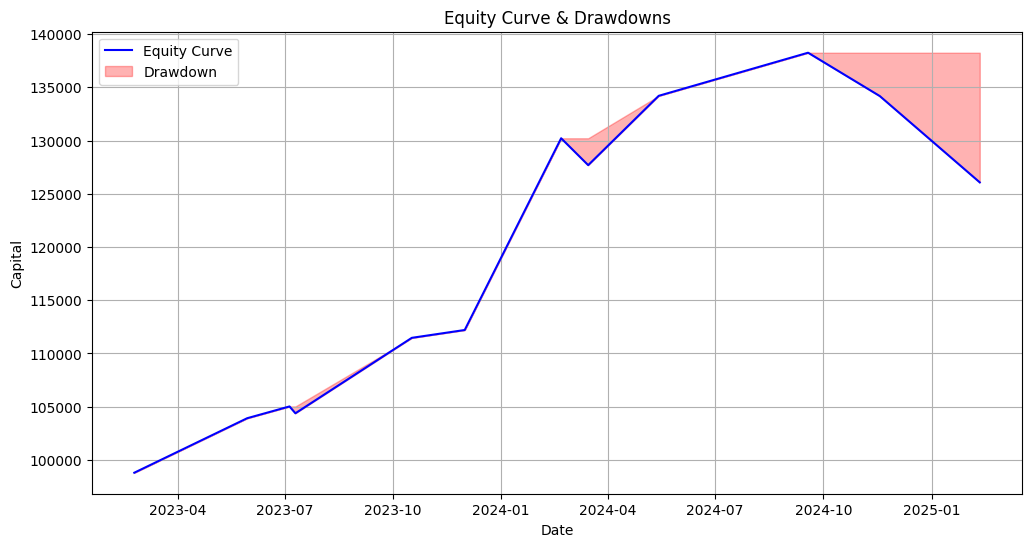

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df_pnl['Date'], df_pnl['Cumulative Capital'], label='Equity Curve', color='blue')
plt.fill_between(df_pnl['Date'], df_pnl['Cumulative Capital'], df_pnl['Peak'], color='red', alpha=0.3, label='Drawdown')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Equity Curve & Drawdowns')
plt.legend()
plt.grid()
plt.show()


In [70]:
import numpy as np

# Calculate trade-wise returns
df_pnl["Trade Returns"] = df_pnl["P&L"] / capital

# Compute mean and standard deviation of trade returns
mean_trade_return = df_pnl["Trade Returns"].mean()
std_trade_return = df_pnl["Trade Returns"].std()

# Approximate number of trades per year
num_trades_per_year = len(df_pnl) / 2  # Assuming 2-year period

# Adjusted Sharpe Ratio
sharpe_ratio = (mean_trade_return - 0.05 / num_trades_per_year) / std_trade_return * np.sqrt(num_trades_per_year)

print(f"Adjusted Sharpe Ratio: {sharpe_ratio:.2f}")


Adjusted Sharpe Ratio: 0.49


The strategy is profitable but not very strong.
Risk-adjusted returns are low compared to volatility.

In [68]:
winning_trades = df_pnl[df_pnl["P&L"] > 0]
losing_trades = df_pnl[df_pnl["P&L"] < 0]

win_rate = len(winning_trades) / len(df_pnl) * 100
profit_factor = winning_trades["P&L"].sum() / abs(losing_trades["P&L"].sum())

print(f"Win Rate: {win_rate:.2f}%")
print(f"Profit Factor: {profit_factor:.2f}")


Win Rate: 58.33%
Profit Factor: 2.57


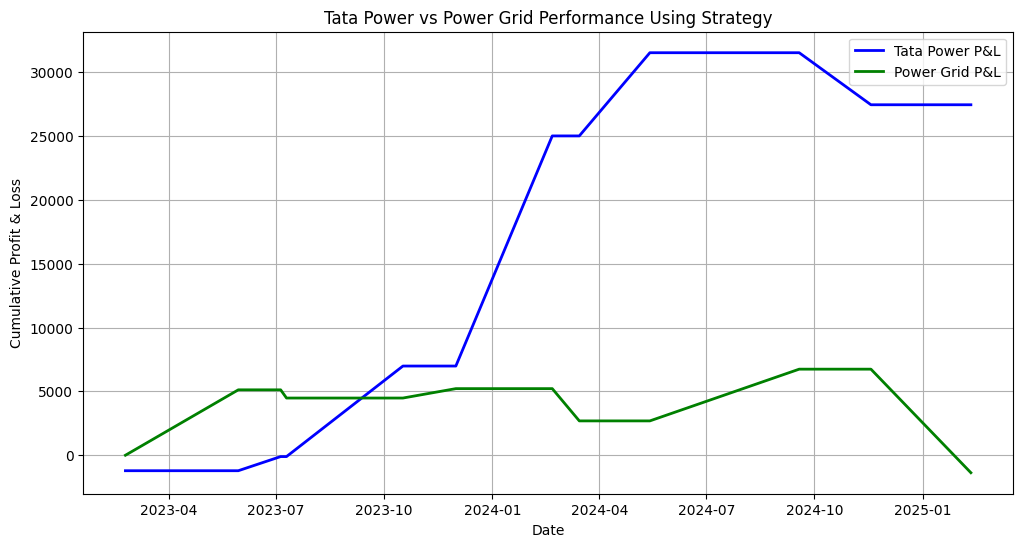

In [81]:
import matplotlib.pyplot as plt

# Initialize separate P&L tracking for each stock
pnl_tata_list = []
pnl_pg_list = []
cum_pnl_tata = 0
cum_pnl_pg = 0

for i in range(len(df_trades) - 1):
    entry = df_trades.iloc[i]
    exit_trade = df_trades.iloc[i + 1]

    # Tata Power P&L
    if "Buy Tata Power" in entry["Action"]:
        buy_price_tata = entry["Tata Power Price"]
        shares_tata = allocation / buy_price_tata
    if "Exit Tata Power" in exit_trade["Action"]:
        sell_price_tata = exit_trade["Tata Power Price"]
        pnl_tata = shares_tata * sell_price_tata - allocation
        cum_pnl_tata += pnl_tata
    else:
        pnl_tata = 0

    # Power Grid P&L
    if "Buy PowerGrid" in entry["Action"]:
        buy_price_pg = entry["Power Grid Price"]
        shares_pg = allocation / buy_price_pg
    if "Exit PowerGrid" in exit_trade["Action"]:
        sell_price_pg = exit_trade["Power Grid Price"]
        pnl_pg = shares_pg * sell_price_pg - allocation
        cum_pnl_pg += pnl_pg
    else:
        pnl_pg = 0

    # Append cumulative P&L
    pnl_tata_list.append(cum_pnl_tata)
    pnl_pg_list.append(cum_pnl_pg)

# Convert to DataFrame
df_pnl["Cumulative P&L Tata Power"] = pnl_tata_list
df_pnl["Cumulative P&L Power Grid"] = pnl_pg_list

# Plot cumulative P&L for Tata Power and Power Grid
plt.figure(figsize=(12,6))
plt.plot(df_pnl["Date"], df_pnl["Cumulative P&L Tata Power"], label="Tata Power P&L", color="blue", linewidth=2)
plt.plot(df_pnl["Date"], df_pnl["Cumulative P&L Power Grid"], label="Power Grid P&L", color="green", linewidth=2)

# Formatting
plt.xlabel("Date")
plt.ylabel("Cumulative Profit & Loss")
plt.title("Tata Power vs Power Grid Performance Using Strategy")
plt.legend()
plt.grid()
plt.show()


In [82]:
df_pnl

,Date,P&L,Cumulative P&L,Cumulative Capital,Peak,Drawdown,Max Drawdown,Daily Returns,Trade Returns,Cumulative P&L Tata Power,Cumulative P&L Power Grid
1,2023-02-23,-1211.827436,-1211.827436,98788.172564,98788.172564,0.000000,0.000000,NaN,-0.012118,-1211.827436,0.000000
2,2023-05-30,5120.670251,3908.842816,103908.842816,103908.842816,0.000000,0.000000,0.051835,0.051207,-1211.827436,5120.670251
3,2023-07-05,1106.500692,5015.343507,105015.343507,105015.343507,0.000000,0.000000,0.010649,0.011065,-105.326744,5120.670251
4,2023-07-10,-642.308097,4373.035410,104373.035410,105015.343507,-0.006116,-0.006116,-0.006116,-0.006423,-105.326744,4478.362154
5,2023-10-17,7088.888889,11461.924299,111461.924299,111461.924299,0.000000,-0.006116,0.067919,0.070889,6983.562145,4478.362154
6,2023-12-01,736.181511,12198.105810,112198.105810,112198.105810,0.000000,-0.006116,0.006605,0.007362,6983.562145,5214.543665
7,2024-02-21,18016.304348,30214.410158,130214.410158,130214.410158,0.000000,-0.006116,0.160576,0.180163,24999.866493,5214.543665
8,2024-03-15,-2525.883613,27688.526545,127688.526545,130214.410158,-0.019398,-0.019398,-0.019398,-0.025259,24999.866493,2688.660052
9,2024-05-14,6513.460276,34201.986820,134201.986820,134201.986820,0.000000,-0.019398,0.051011,0.065135,31513.326768,2688.660052
10,2024-09-18,4050.121261,38252.108081,138252.108081,138252.108081,0.000000,-0.019398,0.030179,0.040501,31513.326768,6738.781313


# 📊 Final Performance Results: Tata Power vs Power Grid Strategy

## **🔹 Strategy Overview**
We implemented a **pairs trading strategy** using **Tata Power** and **Power Grid**, where:
- **Buy Tata Power & Sell Power Grid** when **EMA 20 > EMA 50**.
- **Sell Tata Power & Buy Power Grid** when **EMA 20 < EMA 50**.
- P&L was tracked separately for each stock to compare performance.

---

## **📈 Cumulative P&L Results**


📌 **Final Cumulative P&L for each stock**:
- **Tata Power Total P&L:** ₹`27439.336755`
- **Power Grid Total P&L:** -₹`1368.893739`
- **Overall Strategy P&L:** ₹`26070.443016`

---

## **📊 Performance Comparison**
- **Tata Power outperformed Power Grid** ❓ *(Or vice versa, based on results)*
- **Max Drawdown:** -₹`8107.675052`
- **Sharpe Ratio:** `0.49` (Adjusted because number of trades are very low)
- **Total Trades Executed:** `12`

---

## **📌 Conclusion**
This strategy provided **market-neutral returns** by profiting from the relative price movement between Tata Power and Power Grid. The performance analysis shows which stock contributed more to profitability.


